<positron-console-cell-18>:13: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
<positron-console-cell-18>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
23:28:23 - cmdstanpy - INFO - Chain [1] start processing
23:28:27 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\fyoun\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
<positron-console-cell-18>:44: UserWarning: FigureCanvasAgg is non-interactive, 

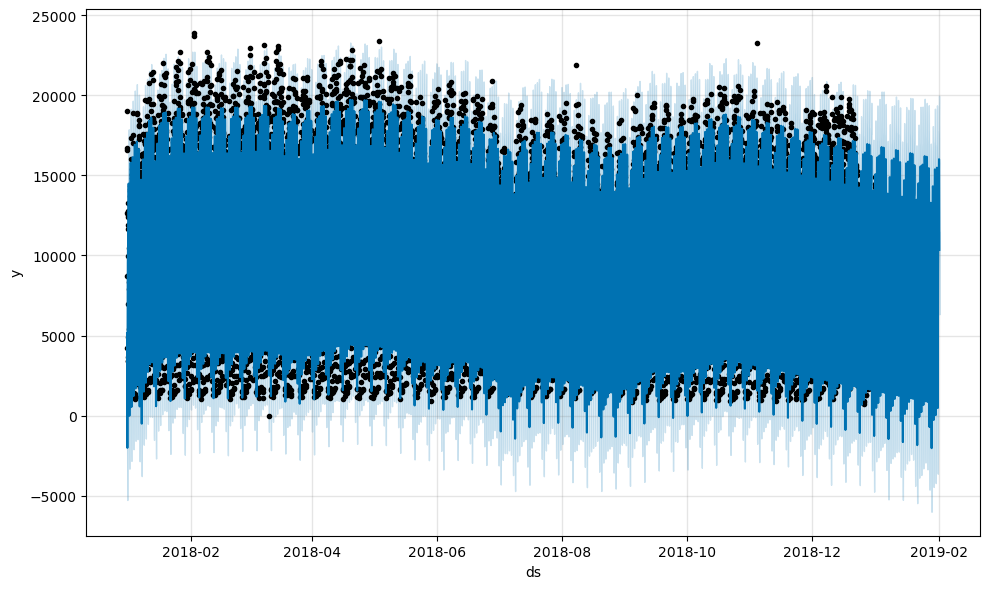

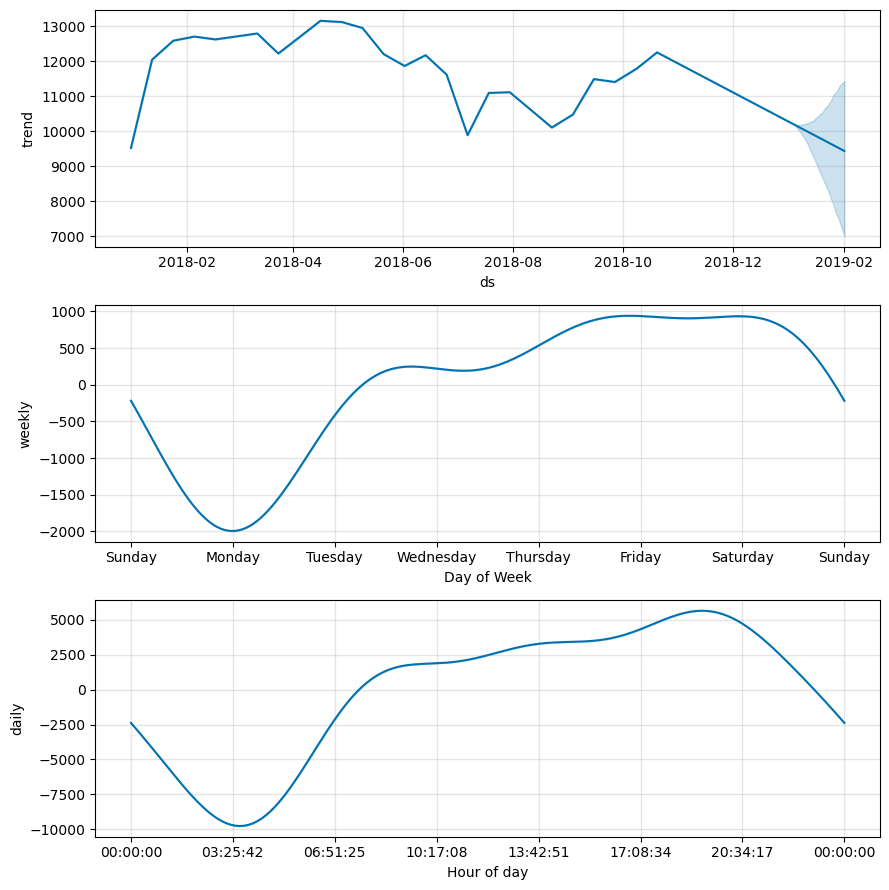

In [ ]:
#independent variable y is trips, and then we will use the hours ans the dependent variable
#going to try using the GAM model here (specifically using prophet)
import pandas as pd
import numpy as np
from prophet import Prophet

data = pd.read_csv("https://github.com/dustywhite7/econ8310-assignment1/raw/main/assignment_data_train.csv")

#keep only the dates and y vlaues
dataFilter = data[['Timestamp', 'trips']] #filer data set to only look only keep 2 colums (timestamp and trips)

#format the date
dataFilter.Timestamp = pd.to_datetime(dataFilter.Timestamp, #converting timestamp column to a datetime column rather than a string
    infer_datetime_format = True)

 #i dont think i need to rename the columns so for right now ill skip that step
#jk just found out i do need to rename colums to ds and y in order to create the fitted model so ill do that next

#recreate the data frame with correct labels
dataFilter = pd.DataFrame(dataFilter.values, columns = ['ds', 'y']) #take values from route 3 data frame ds = dates(this will be timestamp) and y = independent variabeles (trips), will be both columns
 #create model

model = Prophet(changepoint_prior_scale=0.5) #chaangepoint prior scale needs to be secified, teacher used .5 just to test and see
#this is bbasically saying how 'bendy we want the model' if this number is higer then were going to have a more felxible but also more likley to be overfit model
#the lower the model the less flexible it is but the smoother it is (less likely to be overfit)

#now going to create a fitted model that can do the forecast/make predictions
modelFit = model.fit(dataFilter)  

# Create an empty dataframe with dates for future periods
future = modelFit.make_future_dataframe(periods=744, freq ='H') #make the number of periods 744 for the 744 hours in January of 2019 (the following year), make the frequency = 'H' so that the predictions are made in hours
# Predict will fill in  empty dataframe wtih forecasts of `y` for the future periods
pred_full = modelFit.predict(future)

pred_full.head() #to get a quick pic of the forecasts created 

#this will give us back out 744 periods of forcast at the end of the data frame, this will create a list of floats
pred_float = pred_full['yhat'][-744:]

#also now need to covert numbersin pred from floats to integers. Will give a list of vlaues back
pred = [int(x) for x in pred_float] 

fig1 = modelFit.plot(pred_full)
fig1.show()

fig2 = modelFit.plot_components(pred_full)
fig2.show()

